In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Dataset Description</h3><br>
The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

<b>Attribute Information:</b>

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

<b>To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.</b>

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [14]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

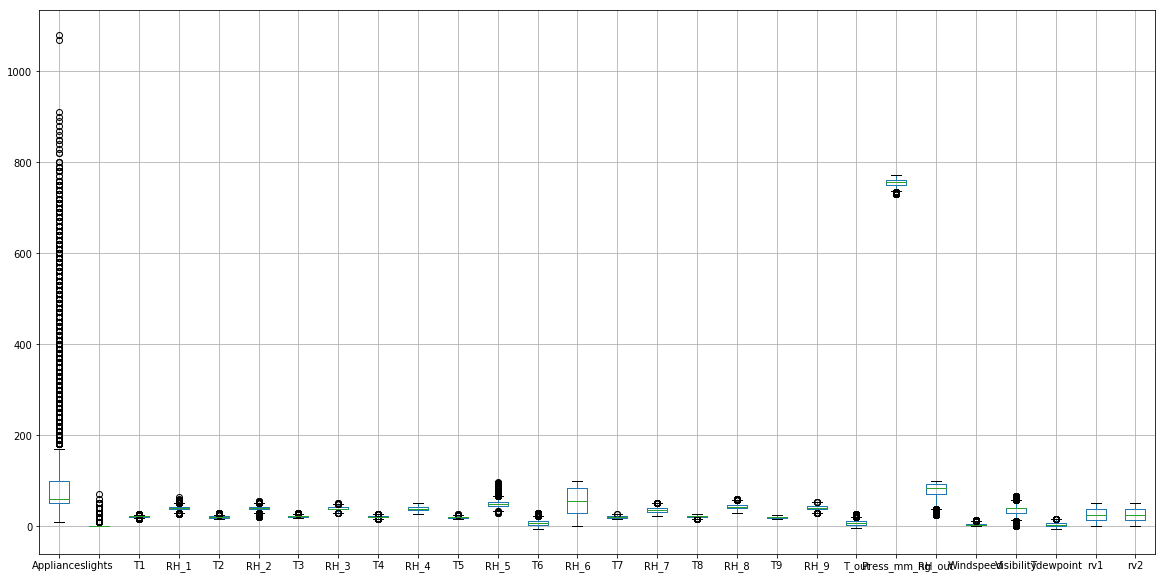

In [16]:
# A brief review of the distribution of the dataset
plt.figure(figsize=(20,10))
df.boxplot();

In [17]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [18]:
# Check for missing value in the data set
df.isna().values.any()

False

# Preprocessing

<b>To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.</b>

In [24]:
df.columns.drop(['date', 'lights'])

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [25]:
# normalize the data using min-max scaler date and lights

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

norm_df = pd.DataFrame(scaler.fit_transform(df.drop(columns=['date', 'lights'])),
                       columns=df.columns.drop(['date', 'lights']))

x_total = norm_df.drop(columns='Appliances')
y_total = norm_df['Appliances']


#  Split the dataset into train(70%) and test(30%) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total,
                                                    test_size=0.3, random_state=42)

# The Model: Multiple Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
y_pred = linear_model.predict(x_test)

In [36]:
linear_model.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

# Regression Metrics

###  Mean Absolute error

In [31]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 3)

0.05

### $R^2$  score (Coefficient of Determination)

In [33]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score, 3)

0.149

### $RSS$ (Residual Sum of Squares)

In [37]:
rss = np.sum(np.square(y_test - y_pred))
round(rss, 3)

45.348

### $RMSE$ (Root Mean Squared Error)

In [83]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3)

0.088

# ANSWERS TO QUESTION 
<pre>Worked solution<pres>

In [92]:
# Question 12
linear_model_12 = LinearRegression()

x_12_train, x_12_test, y_12_train, y_12_test = train_test_split(x_train.T2.reshape(-1,1),
                                                                x_train.T6.reshape(-1,1),
                                                                test_size=0.3,
                                                                random_state=42)
#fit the model to the training dataset
linear_model_12.fit(x_12_train, y_12_train)
#obtain predictions
y_pred_12 = linear_model_12.predict(x_12_test)

from sklearn.metrics import r2_score
r2_score_12 = r2_score(y_12_test, y_pred_12)
round(r2_score_12, 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


0.64

In [48]:
# Question 13
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_12_test, y_pred_12)
round(mae, 2)

0.08

In [49]:
# Question 14
rss = np.sum(np.square(y_12_test - y_pred_12))
round(rss, 2)

46.08

In [85]:
# Question 15
from sklearn.metrics import  mean_squared_error
rmse_15 = np.sqrt(mean_squared_error(y_12_test, y_pred_12))
round(rmse_15, 3)

0.105

In [ ]:
# Question 16

Coefficient of Determination == $R^2  value$

In [61]:
# Quetion 17
linear_model.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

In [62]:
x_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [63]:
model_coef = pd.DataFrame({'features':x_train.columns, 'coeff':linear_model.coef_})

In [75]:
model_coef = model_coef.sort_values(by='coeff').reset_index()

In [76]:
model_coef

,index,coeff,features
0,3,-0.456698,RH_2
1,18,-0.321860,T_out
2,2,-0.236178,T2
3,16,-0.189941,T9
4,15,-0.157595,RH_8
5,20,-0.077671,RH_out
6,13,-0.044614,RH_7
7,17,-0.039800,RH_9
8,8,-0.015657,T5
9,0,-0.003281,T1


In [106]:
print("Feature with lowest weight:", model_coef.iloc[0].features)
print("Feature with Highest weight:", model_coef.iloc[-1].features)

Feature with lowest weight: RH_2
Feature with Highest weight: RH_1


In [78]:
# Question 18
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
y_pred_ridge = ridge_reg.predict(x_test)

In [80]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
round(rmse_ridge, 3)

0.088

In [84]:
assert round(rmse_ridge, 3) == round(rmse, 3)

In [86]:
# Question 19

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
y_pred_lasso = lasso_reg.predict(x_test)

In [89]:
len(lasso_reg.coef_[lasso_reg.coef_ != 0])

4

In [91]:
# Question 20
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
round(rmse_lasso, 3)

0.094